# 녹음된 오디오 test
record_audio 에서 녹음된 오디오의 전처리과정 test

In [7]:
import scipy.io.wavfile as wv_file
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import Audio
from scipy.signal import butter, lfilter
from scipy.fftpack import fft
import random
plt.rcParams["figure.figsize"] = (30,20)
fs,samples_filt = wv_file.read('voice.wav')
N = len(samples_filt)
T = 1/fs
yf = fft(samples_filt)
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

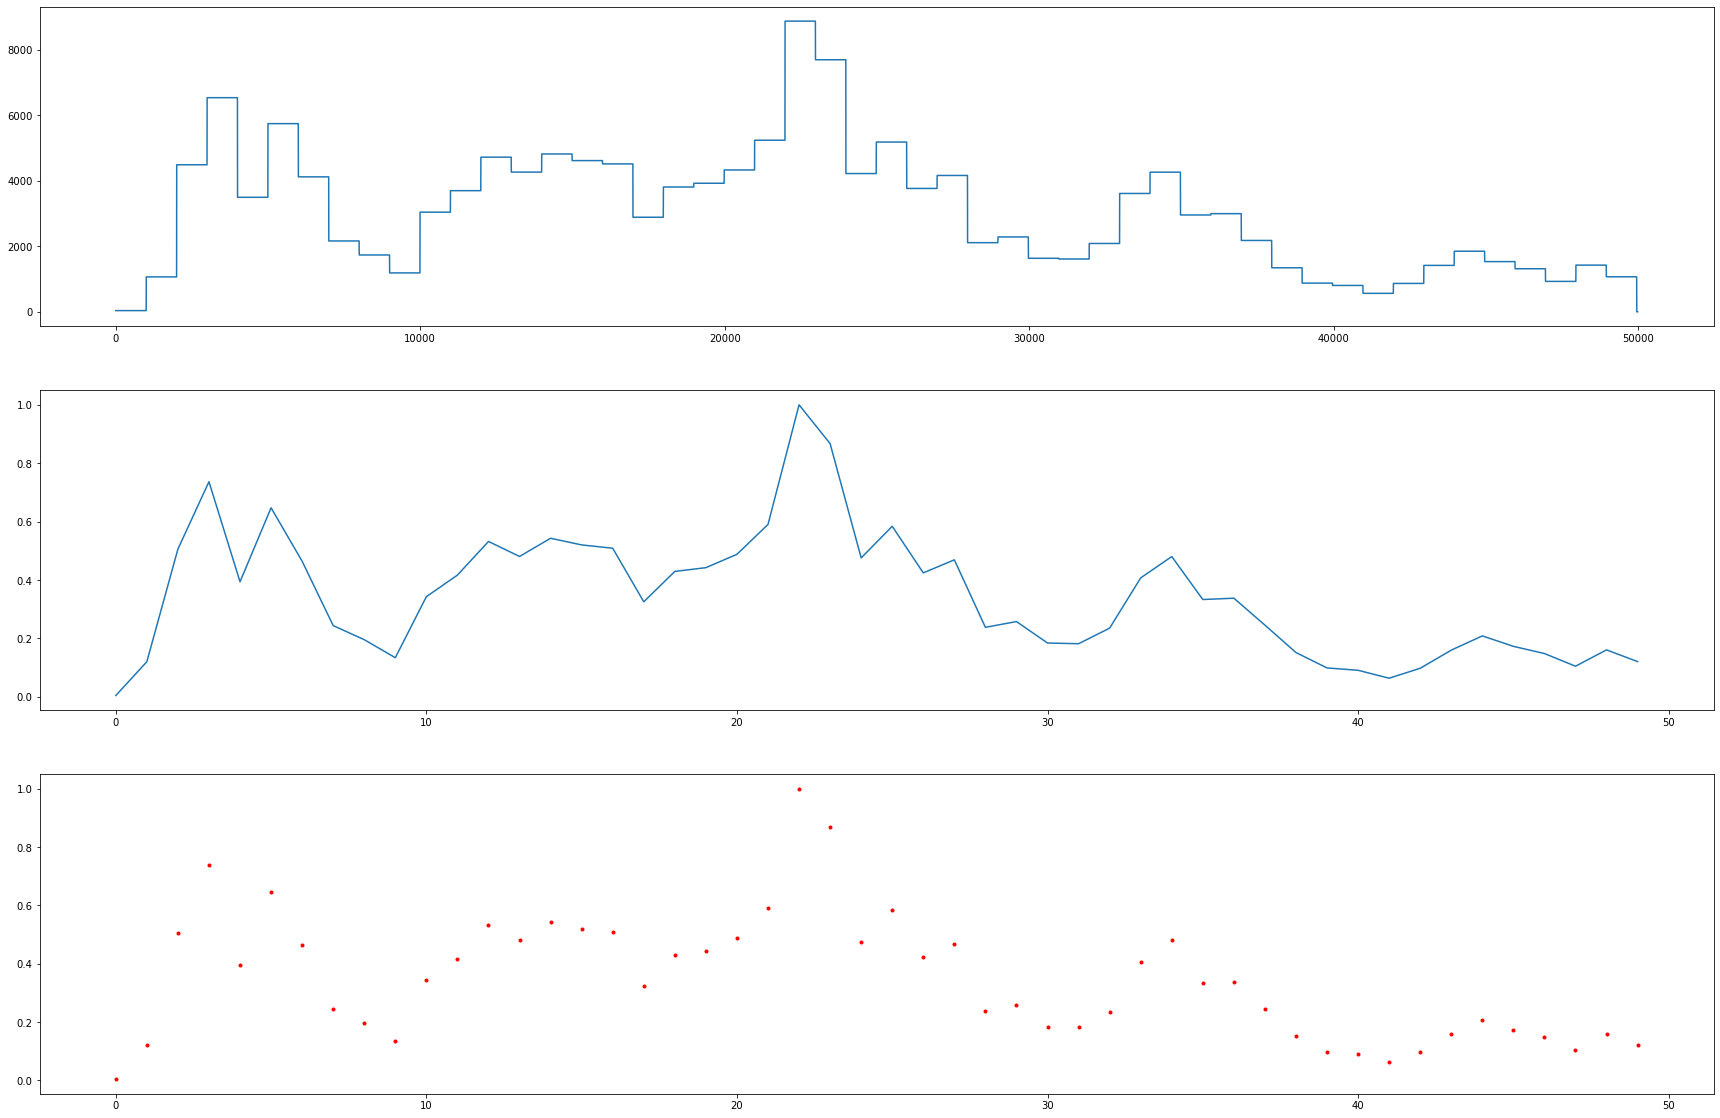

In [8]:
if True:
    for i in range(0,len(xf)):
        if xf[i] > 5000:
            break
    flen = i
    freq = 2.0/N * np.abs(yf[0:N//2])
        # FFT(Fast Fourier Transform) 사용, 변환을 빠르게 수행 효율↑
    freqs = freq[0:flen]
    bunum = 50
    wlen = int(flen/bunum)
    bucket = [0]*len(freqs)
    st = 0
    feature_vector = []
    for i in range(0,bunum):
        binval = 0
        for m in range(st,st+wlen):
            binval = binval+freqs[m]
        feature_vector.append(binval)
        for m in range(st,st+wlen):
            bucket[m] = binval
        st = m+1
    feature_vector = feature_vector/max(feature_vector)
    plt.subplot(311)
    plt.plot(bucket)
    plt.subplot(312)
    plt.plot(feature_vector)
    plt.subplot(313)
    plt.plot(feature_vector, '.r')